In [2]:
#import libraries
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
import warnings 
warnings. filterwarnings('ignore')

In [4]:
#initialize data, perform linear regression

#define constants
n = 10
m = 11
mu = 0
#sigma_2 = 5
#sigma = np.sqrt(sigma_2)

#create matrices for storing data
x = np.zeros(n)
y = np.zeros(n)

def lineardatagenerator(n):
    random = np.random.uniform(0,1)
    noise = sigma*np.random.randn(n)
    x = np.random.rand(n)
    y = 36 * x + noise
    return x, y

def designmatrix(x_input,m):
    X = np.vstack([np.ones(np.size(x_input))]).T
    for i in range(m):
        X = np.vstack([X.T, x_input**(i+1)]).T
    return X

def designvector(x_input,m):
    dvector = np.vstack([1]).T
    for i in range(m):
        dvector = np.vstack([dvector.T, x_input**(i+1)]).T
    return dvector
    
def kernelfunction(x, x_value, index, m):
    dmatrix = designmatrix(x, m)
    dvector = designvector(x_value, m)
    kernel =  dvector @ np.linalg.inv(dmatrix.T @ dmatrix) @ dmatrix[:][index]
    return kernel

In [ ]:
np.random.seed(seed=4803)
scalefactor = 1

x = 2*scalefactor*np.random.rand(n) - scalefactor

values = np.arange(-scalefactor,scalefactor, 0.01)

kernels = np.zeros((len(values),n))

for i in range(len(values)):
    for j in range(n):
        kernels[i][j] = kernelfunction(x, values[i], j, m)

Text(0.5, 0, 'K(x,x_i)')

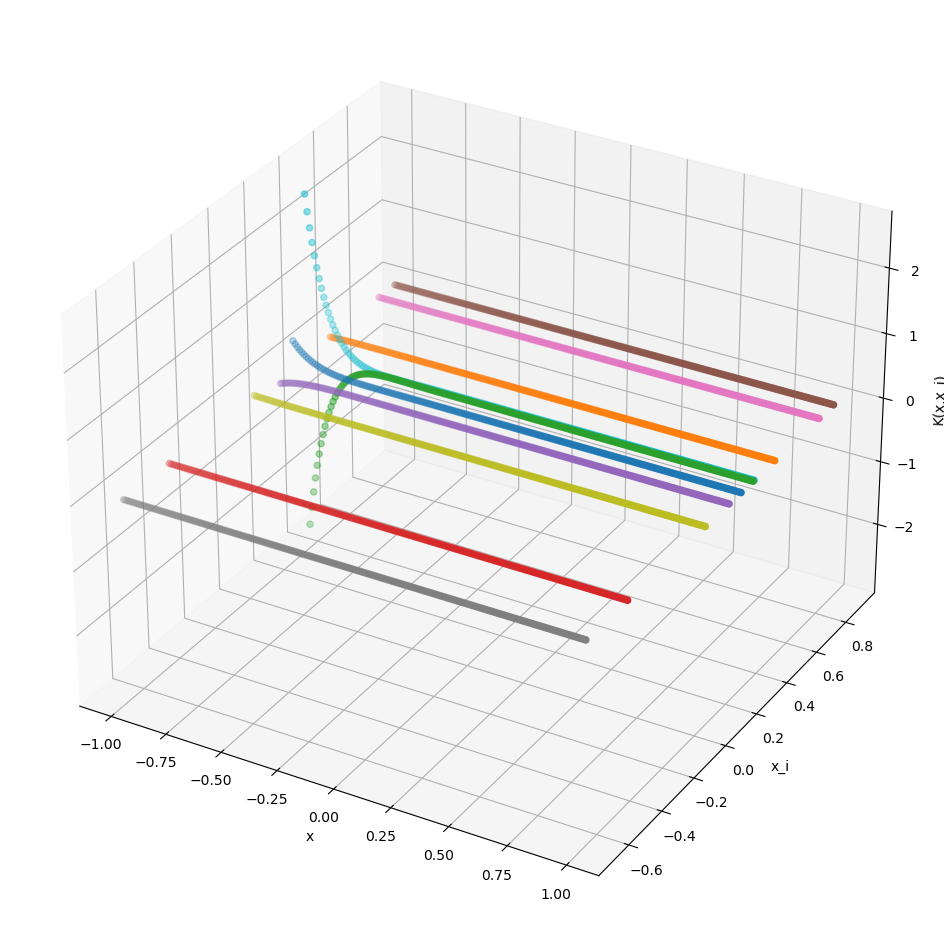

In [6]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(n):
    ax.scatter(values, x[i], kernels[:,i])
ax.set_xlabel('x')
ax.set_ylabel('x_i')
ax.set_zlabel('K(x,x_i)')

Text(0.5, 0, 'K(x,x_i)')

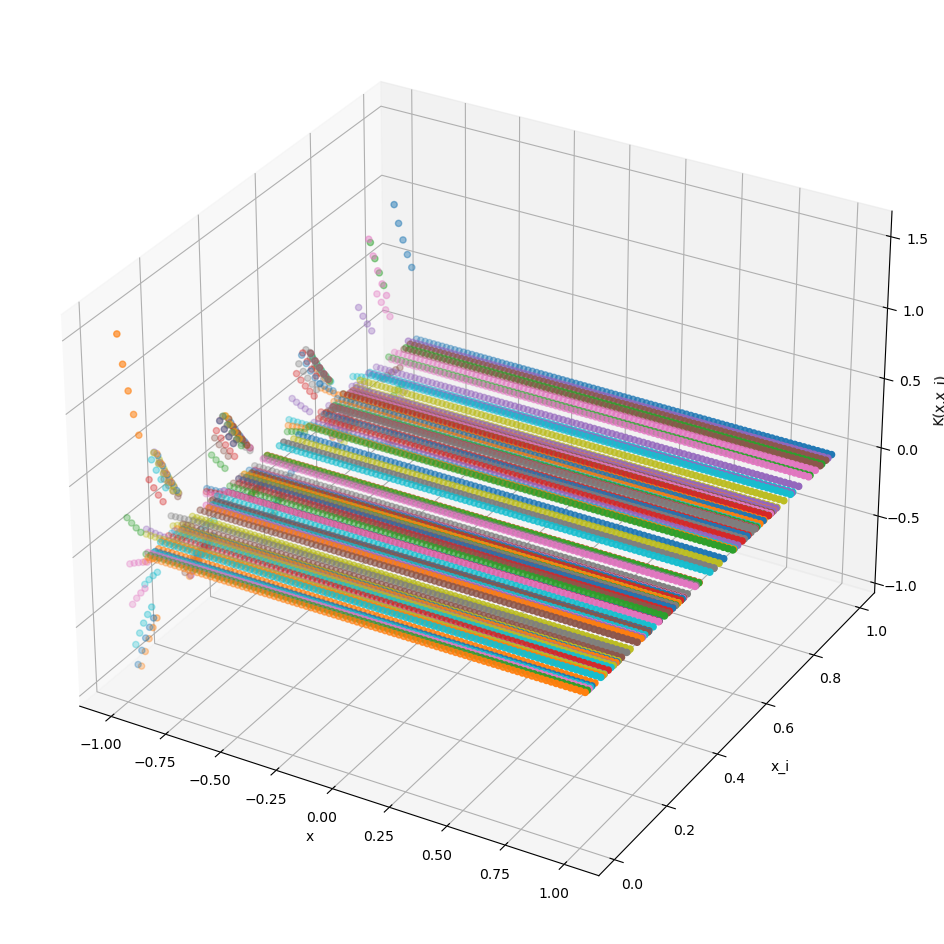

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(n):
    ax.scatter(values, x[i], kernels[:,i])
ax.set_xlabel('x')
ax.set_ylabel('x_i')
ax.set_zlabel('K(x,x_i)')

This function is not the same for all x_i. Clearly, as the above 3d-plot indicates, there seems to be a peak in the value of the kernel function at each value of x_i, so there is some degree of dependence on x_i. 

Let's make some graphs with different polynomial degrees!

In [ ]:
scalefactor = 1
polydeg1 = 5

x = 2*scalefactor*np.random.rand(n) - scalefactor

values = np.arange(-scalefactor,scalefactor, 0.01)

kernels = np.zeros((len(values),n))

for i in range(len(values)):
    for j in range(n):
        kernels[i][j] = kernelfunction(x, values[i], j, polydeg1)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(n):
    ax.scatter(values, x[i], kernels[:,i])
ax.set_xlabel('x')
ax.set_ylabel('x_i')
ax.set_zlabel('K(x,x_i)')
#ax.view_init(30, 20)

In [ ]:
# define
def ridgekernelfunction(x, x_value, index, m, lmdba):
    dmatrix = designmatrix(x, m)
    dvector = designvector(x_value, m)
    kernel = dvector @ np.linalg.inv(dmatrix.T @ dmatrix + lmbda * np.identity(n)) @ dmatrix[:][index]
    return kernel

ridgekernelfunction(x,0.5,31,10,1)

In [41]:
def designmatrix(x_input,m):
    X = np.vstack([np.ones(np.size(x_input))]).T
    for i in range(m):
        X = np.vstack([X.T, x_input**(i+1)]).T
    return X

In [13]:
designvector(1,3)

array([[1, 1, 1, 1]])

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8., 16., 32., 64.],
       [ 1.,  2.,  4.,  8., 16., 32., 64.]])